In [88]:
from datascience import *
import json


# Pull fields from US Senate account data
profile = [[] for i in range(0,10)]
with open("twittergov/us-senate.json","r") as f:
    for line in f:
        user = json.loads(line)
        profile[0].append(user['followers_count'])
        profile[1].append(user['friends_count'])
        profile[2].append(user['statuses_count'])
        profile[3].append(user['name'])
        profile[4].append(user['description'] if 'description' in user else '')
        profile[5].append(user['created_at'])
        profile[6].append(user['followers_count'])
        profile[7].append(user['profile_image_url'])
        profile[8].append(user['screen_name'])
        profile[9].append(user['id_str'])
# http://data8.org/datascience/tutorial.html#creating-a-table
profiles = Table().with_columns([
    'followers', profile[0],
    'friends', profile[1],
    'statuses', profile[2],
    'names', profile[3],
    'description', profile[4],
    'created_at', profile[5],
    'followers_count', profile[6],
    'profile_image_url', profile[7],
    'screen_name', profile[8],
    'id_str', profile[9]
])

focus_pattern = 'DACA|Dreamer|DreamAct'
raw_count = 0
focus_count = 0
tweet = [[] for i in range(0,5)]
url = [[] for i in range(0,4)]
tag = [[],[]]

import re
focus = re.compile(focus_pattern,re.I)
# https://docs.python.org/3/library/urllib.parse.html
from urllib.parse import urlsplit
for screen_name in profiles.column('screen_name'):
    with open("twittergov/us-senate/%s.json" % screen_name,"r") as f:
        for line in f:
            raw_count = raw_count + 1
            if not focus.search(line): continue
            focus_count = focus_count + 1
            status = json.loads(line)
            tweet[0].append(status['created_at'])
            tweet[1].append(status['full_text'])
            tweet[2].append(status['retweet_count'] if 'retweet_count' in status else 0)
            tweet[3].append(status['favorite_count'] if 'favorite_count' in status else 0)
            tweet[4].append(status['id_str'])
            for hashtag in status['hashtags']:
                tag[0].append(status['id_str'])
                tag[1].append(hashtag['text'])
            for link in status['urls']:
                url[0].append(status['id_str'])
                url[1].append(link['url'])
                url[2].append(link['expanded_url'])
                parts = urlparse(link['expanded_url'])
                url[3].append(parts[1])
tags = Table().with_columns([
    'tweet', tag[0],
    'tag', tag[1],
])
urls = Table().with_columns([
    'tweet', url[0],
    'short_url', url[1],
    'url', url[2],
    'domain', url[3]
])
tweets = Table().with_columns([
    'id_str', tweet[4],
    'created_at', tweet[0],
    'full_text', tweet[1],
    'retweet_count', tweet[2],
    'favorite_count', tweet[3]
])

In [123]:

print("Accounts Examined: %s " % profiles.num_rows)
print("Raw Tweets: %s" % raw_count)
print("Focus Tweets: %s" % focus_count)
print("Unique Links: %s" % urls.group('url').num_rows)
print("Unique Hashtags: %s" % tags.group('tag').num_rows)


Accounts Examined: 100 
Raw Tweets: 152762
Focus Tweets: 3403
Unique Links: 916
Unique Hashtags: 216


In [94]:
if False:
    print(profiles)
    print(tweets)
    print(urls)
    print(tags)
    import pprint
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(user)
    pp.pprint(status)

# import re
#  re.sub("_normal.jpg","_400x400.jpg", senator['profile_image_url'])


In [77]:
tags.group('tag').sort('count', descending=True)

tag,count
DACA,740
Dreamers,497
DreamActNow,426
DREAMers,348
DreamAct,346
DefendDACA,269
ProtectDreamers,153
DREAMAct,73
SaveDACA,65
DREAMActNow,61


In [78]:
urls.group('domain').sort('count', descending=True)

domain,count
twitter.com,374
www.facebook.com,63
bit.ly,59
www.youtube.com,40
www.nytimes.com,33
www.washingtonpost.com,29
thehill.com,19
youtu.be,16
www.politico.com,16
ow.ly,16


In [85]:

urls.group('url').num_rows



array([7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3])

In [125]:
print("\n".join(urls.group('url').sort('count', descending=True).where('count', are.above(3)).column('url')))


https://www.uscis.gov/humanitarian/consideration-deferred-action-childhood-arrivals-process/renew-your-daca
https://www.facebook.com/senatormenendez
https://twitter.com/politico/status/904500106107523073
https://www.youtube.com/watch?v=Rd63mZ-QVj8
https://www.heinrich.senate.gov/press-releases/protectdreamers
https://www.facebook.com/senatormenendez/
https://www.c-span.org/networks/?channel=c-span-2
https://www.americanprogress.org/issues/immigration/news/2017/07/21/436419/new-threat-daca-cost-states-billions-dollars/
https://twitter.com/washingtonpost/status/837279433589403650
https://twitter.com/realdonaldtrump/status/977166887493799936
https://twitter.com/realDonaldTrump/status/964512164865363968
https://goo.gl/BDvFSJ
http://www.sfchronicle.com/opinion/openforum/article/Dreamers-fear-deportation-10781531.php
http://ow.ly/UOQG30eXLEe
http://ow.ly/GOMu30eVlG0
http://feinstein.senate.gov/dreamers
http://bit.ly/1PgBvJk


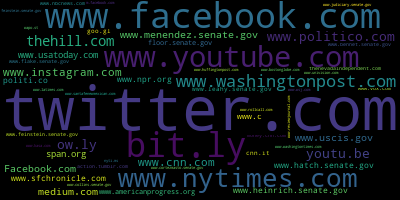

In [109]:
from wordcloud import WordCloud
# sort and normalized frequency tuples can use fit_words
# http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
text = " ".join(urls.column('domain'))
wordcloud = WordCloud(regexp="[\w\.]*", collocations=False).generate(text)
image = wordcloud.to_image()
image

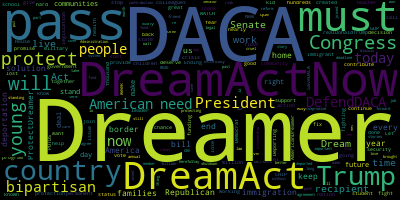

In [121]:
text = " ".join(tweets.column('full_text'))
wordfreq = WordCloud(collocations=False).process_text(text)

for i in ['https', 'amp','co']:
    if i in wordfreq:
        del wordfreq[i]
wordcloud = WordCloud().generate_from_frequencies(wordfreq)
image = wordcloud.to_image()
image